In [1]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

In [2]:
df = pd.read_csv('./18_07_2019_18_19 50-50/full_results.csv')

In [3]:
print('Name: precision, recall, fscore')
print('P_bin:', precision_recall_fscore_support(df['P_bin'], df['P_bin_pred'], average='micro')[:3])
print('R_bin:', precision_recall_fscore_support(df['R_bin'], df['R_bin_pred'], average='micro')[:3])
print('Res_bin:', precision_recall_fscore_support(df['Res_bin'], df['Res_bin_pred'], average='micro')[:3])
print('Cal_bin:', precision_recall_fscore_support(df['Cal_bin'], df['Cal_bin_pred'], average='micro')[:3])

Name: precision, recall, fscore
P_bin: (0.7333333333333333, 0.7333333333333333, 0.7333333333333333)
R_bin: (0.8666666666666667, 0.8666666666666667, 0.8666666666666667)
Res_bin: (0.6285714285714286, 0.6285714285714286, 0.6285714285714286)
Cal_bin: (0.6095238095238096, 0.6095238095238096, 0.6095238095238096)


In [4]:
multi = np.array(list(zip(df['P_bin'], df['R_bin'], df['Res_bin'], df['Cal_bin'])))
multi_pred = np.array(list(zip(df['P_bin_pred'], df['R_bin_pred'], df['Res_bin_pred'], df['Cal_bin_pred'])))

In [5]:
precision_recall_fscore_support(multi, multi_pred, average='micro')[:3]

(0.6530612244897959, 0.42105263157894735, 0.512)

In [6]:
print('Accuracy:')
print('P_bin:', accuracy_score(df['P_bin'], df['P_bin_pred']))
print('R_bin:', accuracy_score(df['R_bin'], df['R_bin_pred']))
print('Res_bin:', accuracy_score(df['Res_bin'], df['Res_bin_pred']))
print('Cal_bin:', accuracy_score(df['Cal_bin'], df['Cal_bin_pred']))
print('MultiLabel:', accuracy_score(multi, multi_pred))

Accuracy:
P_bin: 0.7333333333333333
R_bin: 0.8666666666666667
Res_bin: 0.6285714285714286
Cal_bin: 0.6095238095238096
MultiLabel: 0.24761904761904763


In [16]:
quality = pd.read_csv('./quality_all_subs.csv')

In [18]:
# trans = {'P_bin': r'$\mathcal{P}, \neg\mathcal{R}, \neg\mathcal{R}es, \neg\mathcal{C}al$', 
#          'R_bin': r'$\neg\mathcal{P}, \mathcal{R}, \neg\mathcal{R}es, \neg\mathcal{C}al$', 
#          'Res_bin': r'$\neg\mathcal{P}, \neg\mathcal{R}, \mathcal{R}es, \neg\mathcal{C}al$', 
#          'Cal_bin': r'$\neg\mathcal{P}, \neg\mathcal{R}, \neg\mathcal{R}es, \mathcal{C}al$', 
#         "('P_bin', 'R_bin')": r'$\mathcal{P}, \mathcal{R}, \neg\mathcal{R}es, \neg\mathcal{C}al$', 
#          "('P_bin', 'Res_bin')": r'$\mathcal{P}, \neg\mathcal{R}, \mathcal{R}es, \neg\mathcal{C}al$', 
#          "('P_bin', 'Cal_bin')": r'$\mathcal{P}, \neg\mathcal{R}, \neg\mathcal{R}es, \mathcal{C}al$', 
#          "('R_bin', 'Res_bin')": r'$\neg\mathcal{P}, \mathcal{R}, \mathcal{R}es, \neg\mathcal{C}al$', 
#          "('R_bin', 'Cal_bin')": r'$\neg\mathcal{P}, \mathcal{R}, \neg\mathcal{R}es, \mathcal{C}al$', 
#          "('Res_bin', 'Cal_bin')": r'$\neg\mathcal{P}, \neg\mathcal{R}, \mathcal{R}es, \mathcal{C}al$', 
#          "('P_bin', 'R_bin', 'Res_bin')": r'$\mathcal{P}, \mathcal{R}, \mathcal{R}es, \neg\mathcal{C}al$', 
#          "('P_bin', 'R_bin', 'Cal_bin')": r'$\mathcal{P}, \mathcal{R}, \neg\mathcal{R}es, \mathcal{C}al$', 
#          "('P_bin', 'Res_bin', 'Cal_bin')": r'$\mathcal{P}, \neg\mathcal{R}, \mathcal{R}es, \mathcal{C}al$', 
#          "('R_bin', 'Res_bin', 'Cal_bin')": r'$\neg\mathcal{P}, \mathcal{R}, \mathcal{R}es, \mathcal{C}al$', 
#          "('P_bin', 'R_bin', 'Res_bin', 'Cal_bin')": r'$\mathcal{P}, \mathcal{R}, \mathcal{R}es, \mathcal{C}al$' 
# }

trans = {'P_bin': r'$\mathcal{P}$', 
         'R_bin': r'$\mathcal{R}$', 
         'Res_bin': r'$\mathcal{R}es$', 
         'Cal_bin': r'$\mathcal{C}al$', 
        "('P_bin', 'R_bin')": r'$\mathcal{P} \wedge \mathcal{R}$', 
         "('P_bin', 'Res_bin')": r'$\mathcal{P} \wedge \mathcal{R}es$', 
         "('P_bin', 'Cal_bin')": r'$\mathcal{P} \wedge \mathcal{C}al$', 
         "('R_bin', 'Res_bin')": r'$\mathcal{R} \wedge \mathcal{R}es$', 
         "('R_bin', 'Cal_bin')": r'$\mathcal{R} \wedge \mathcal{C}al$', 
         "('Res_bin', 'Cal_bin')": r'$\mathcal{R}es \wedge \mathcal{C}al$', 
         "('P_bin', 'R_bin', 'Res_bin')": r'$\mathcal{P} \wedge \mathcal{R} \wedge \mathcal{R}es$', 
         "('P_bin', 'R_bin', 'Cal_bin')": r'$\mathcal{P} \wedge \mathcal{R} \wedge \mathcal{C}al$', 
         "('P_bin', 'Res_bin', 'Cal_bin')": r'$\mathcal{P} \wedge \mathcal{R}es \wedge \mathcal{C}al$', 
         "('R_bin', 'Res_bin', 'Cal_bin')": r'$\mathcal{R} \wedge \mathcal{R}es \wedge \mathcal{C}al$', 
         "('P_bin', 'R_bin', 'Res_bin', 'Cal_bin')": r'$\mathcal{P} \wedge \mathcal{R} \wedge \mathcal{R}es \wedge \mathcal{C}al$' 
}

In [19]:
trans

{'P_bin': '$\\mathcal{P}$',
 'R_bin': '$\\mathcal{R}$',
 'Res_bin': '$\\mathcal{R}es$',
 'Cal_bin': '$\\mathcal{C}al$',
 "('P_bin', 'R_bin')": '$\\mathcal{P} \\wedge \\mathcal{R}$',
 "('P_bin', 'Res_bin')": '$\\mathcal{P} \\wedge \\mathcal{R}es$',
 "('P_bin', 'Cal_bin')": '$\\mathcal{P} \\wedge \\mathcal{C}al$',
 "('R_bin', 'Res_bin')": '$\\mathcal{R} \\wedge \\mathcal{R}es$',
 "('R_bin', 'Cal_bin')": '$\\mathcal{R} \\wedge \\mathcal{C}al$',
 "('Res_bin', 'Cal_bin')": '$\\mathcal{R}es \\wedge \\mathcal{C}al$',
 "('P_bin', 'R_bin', 'Res_bin')": '$\\mathcal{P} \\wedge \\mathcal{R} \\wedge \\mathcal{R}es$',
 "('P_bin', 'R_bin', 'Cal_bin')": '$\\mathcal{P} \\wedge \\mathcal{R} \\wedge \\mathcal{C}al$',
 "('P_bin', 'Res_bin', 'Cal_bin')": '$\\mathcal{P} \\wedge \\mathcal{R}es \\wedge \\mathcal{C}al$',
 "('R_bin', 'Res_bin', 'Cal_bin')": '$\\mathcal{R} \\wedge \\mathcal{R}es \\wedge \\mathcal{C}al$',
 "('P_bin', 'R_bin', 'Res_bin', 'Cal_bin')": '$\\mathcal{P} \\wedge \\mathcal{R} \\wedge \\m

In [20]:
quality.columns = [trans.get(item,item) for item in list(quality.columns)]

In [21]:
quality['orig_matcher'], quality['sub_matcher'], quality['seq'] = quality['matcher'].str.split('_', expand=True).T.values 
quality['orig_matcher'] = quality['orig_matcher'].str.lstrip('0')
quality[(quality['sub_matcher'].isna())]['sub_matcher'] = '000'

C:\Users\shrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
# quality = quality[~quality['matcher'].str.contains('_')].drop(['P','R','Res','Cal'], axis = 1)
# quality = quality.drop(['matcher', 'P','R','Res','Cal'], axis = 1)

In [23]:
quality_no_subs = quality[~quality['matcher'].str.contains('_')].drop(['P','R','Res','Cal','orig_matcher', 'sub_matcher', 'seq'], 
                                                                      axis = 1)
# sums = [len(quality_no_subs),] + list(quality_no_subs.sum())[1:]
sums = list(quality_no_subs.sum())[1:]
sums = [s/105 for s in sums][::-1]
# names = ['Total',] + list(quality_no_subs.columns)[1:]
names = list(quality_no_subs.columns)[1:][::-1]
cords = list(range(len(quality_no_subs.sum())-1))

In [24]:
print(names)

['$\\mathcal{P} \\wedge \\mathcal{R} \\wedge \\mathcal{R}es \\wedge \\mathcal{C}al$', '$\\mathcal{R} \\wedge \\mathcal{R}es \\wedge \\mathcal{C}al$', '$\\mathcal{P} \\wedge \\mathcal{R}es \\wedge \\mathcal{C}al$', '$\\mathcal{P} \\wedge \\mathcal{R} \\wedge \\mathcal{C}al$', '$\\mathcal{P} \\wedge \\mathcal{R} \\wedge \\mathcal{R}es$', '$\\mathcal{R}es \\wedge \\mathcal{C}al$', '$\\mathcal{R} \\wedge \\mathcal{C}al$', '$\\mathcal{R} \\wedge \\mathcal{R}es$', '$\\mathcal{P} \\wedge \\mathcal{C}al$', '$\\mathcal{P} \\wedge \\mathcal{R}es$', '$\\mathcal{P} \\wedge \\mathcal{R}$', '$\\mathcal{C}al$', '$\\mathcal{R}es$', '$\\mathcal{R}$', '$\\mathcal{P}$']


In [ ]:
plt.clf()
width= 0.9
p1 = plt.barh(cords, sums, align = 'center', color = 'navy', label="Expert Types")
plt.yticks(cords, names, fontsize=14)
plt.xticks([float(y/10) for y in range(7)], fontsize=14)
plt.xlabel("Freq", fontsize=16)
plt.ylabel("Expert Type", fontsize=14)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2, fancybox=True)
# plt.savefig('control_p6.eps', bbox_inches = 'tight', format='eps')
# plt.text(s = '(IsPrecise?, IsThorough?, IsCorrelated?, IsCalibrated?)', x = 3, y = 80, fontsize=12)
plt.savefig('expert_types_no_subs.eps', bbox_inches = 'tight', format='eps')
plt.show()

# COMPLETE!

In [ ]:
# quality_with_subs = quality.drop(['P','R','Res','Cal','orig_matcher', 'sub_matcher', 'seq'], axis = 1)
# sums = [len(quality),] + list(quality.sum())[1:]
# names = ['Total',] + list(quality.columns)[1:]
# cords = list(range(len(quality.sum())))

In [ ]:
# quality_with_subs.sum()

In [12]:
# plt.clf()
# width= 0.9
# p1 = plt.bar(cords, sums, align = 'center', color = 'navy', label="Expert Types", width= width)
# plt.xticks(cords, names, fontsize=14, rotation=90)
# # plt.yticks(,fontsize=14)
# plt.ylabel("Count", fontsize=16)
# plt.xlabel("Type", fontsize=16)
# # plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2, fancybox=True)
# # plt.savefig('control_p6.eps', bbox_inches = 'tight', format='eps')
# plt.savefig('expert_types_with_subs.jpg', bbox_inches = 'tight', format='jpg')
# plt.show()

In [27]:
quality_seqs_full = quality[(quality['seq'].isna()) | quality['seq'].str.contains('0000')]
loc = './figs_new/'

In [28]:
for orig in quality_seqs_full['orig_matcher'].unique():
    max_sub = quality_seqs_full[quality_seqs_full['orig_matcher'] == orig]['sub_matcher'].str.lstrip('0').astype(float).max()
    if np.isnan(max_sub):
        max_sub = 5
    quality_seqs_full.loc[quality_seqs_full['matcher'] == orig, 'sub_matcher'] = int(max_sub)

C:\Users\shrag\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [29]:
confs = {}
confs['22'] = [1.0,
 1.0,
 1.0,
 0.9,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8,
 0.9,
 1.0,
 0.9,
 1.0,
 1.0,
 1.0,
 0.2,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.2,
 0.6,
 0.7,
 1.0,
 1.0]

In [30]:
confs['26'] = [0.9,
 0.7,
 0.8,
 0.9,
 0.85,
 0.85,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [31]:
confs['84'] = [0.6,
 0.3,
 0.2,
 0.9,
 0.9,
 0.7,
 0.6,
 0.7,
 0.2,
 0.9,
 0.5,
 0.8,
 0.8,
 0.7,
 0.6,
 0.5,
 0.4,
 0.7,
 0.6,
 0.5,
 0.4,
 0.7,
 0.6,
 0.5,
 0.4,
 0.7,
 0.6,
 0.5,
 0.9,
 0.7,
 0.8,
 0.8,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.9,
 0.2,
 0.3,
 0.8]

In [32]:
confs['92'] = [1.0,
 0.9,
 0.95,
 0.7,
 0.7,
 1.0,
 0.9,
 1.0,
 0.7,
 0.4,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8,
 0.9,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8,
 0.8,
 0.5,
 0.2,
 0.9,
 1.0,
 0.8,
 0.7,
 1.0,
 0.7,
 0.6,
 0.7]

In [35]:
acum_confs = {}
for conf in confs:
    lst = confs[conf]
    acum_confs[conf] = [sum(lst[:i+1])/(i+1) for i in range(len(lst))] 

In [39]:
len(acum_confs['92'])
# quality_seqs['P'][1:]

59

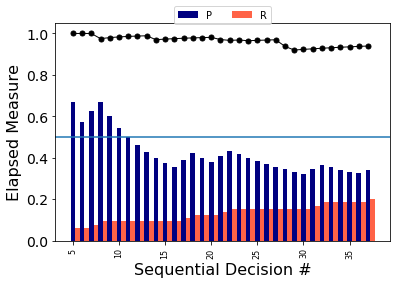

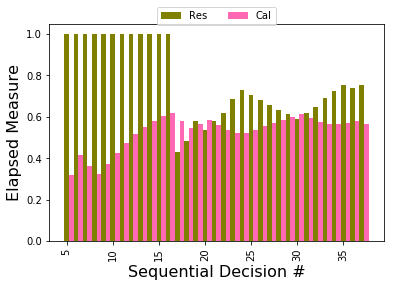

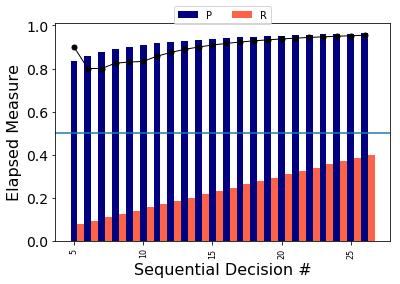

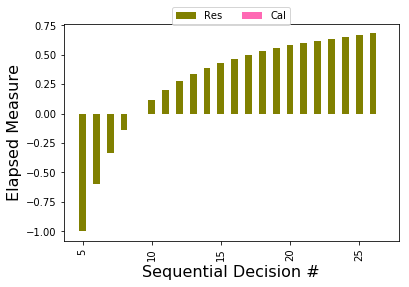

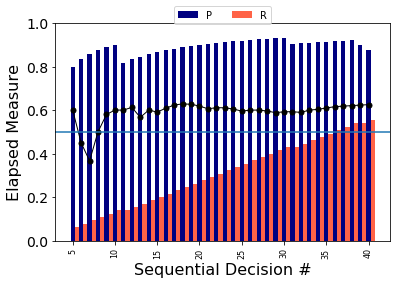

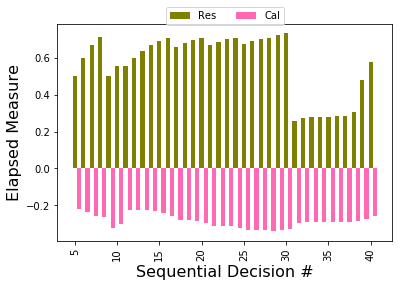

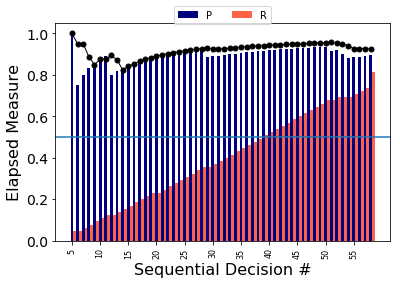

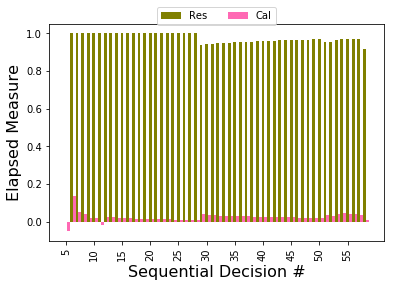

In [43]:
# for orig in quality_seqs_full['orig_matcher'].unique():
for orig in ['22','26','84','92']:
#     print(orig)
    quality_seqs = quality_seqs_full[quality_seqs_full['orig_matcher'] == orig]
    Ps = quality_seqs['P'][1:]
    Rs = quality_seqs['R'][1:]
    lst = acum_confs[orig][:len(Ps)]
    names = list(quality_seqs['sub_matcher'])[1:]
    names = [str(n).lstrip('0') for n in names][:-1] + [int(list(str(n).lstrip('0') for n in names)[-1]) + 1]
    cords = list(range(len(quality_seqs)))[1:]
    print_names = [str((int(n) - 1)) for n in names[::5]]
    print_cords = cords[::5]
    plt.clf()
    width= 0.5
    p1 = plt.bar(cords, Ps, align = 'center', color = 'navy', label="P", width= width)
    p2 = plt.bar([c+width for c in cords], Rs, align = 'center', color = 'tomato', label="R", width= width)
    plt.plot(cords, lst, color = 'black', markersize=5, marker='o', linewidth=1)
    plt.xticks(print_cords, print_names, fontsize=8, rotation = 90)
    plt.yticks(np.linspace(0.0, 1.0, num=6),fontsize=14)
    plt.ylabel("Elapsed Measure", fontsize=16)
    plt.xlabel("Sequential Decision #", fontsize=16)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2, fancybox=True)
    plt.axhline(y=0.5)
    # plt.savefig('control_p6.eps', bbox_inches = 'tight', format='eps')
    plt.savefig(loc + orig + '_P_R_over_time.eps', bbox_inches = 'tight', format='eps')
    plt.show()
    Ress = quality_seqs['Res'][1:]
    Cals = quality_seqs['Cal'][1:]
    lst = acum_confs[orig][:len(Ress)]
    plt.clf()
    width= 0.5
    p1 = plt.bar(cords, Ress, align = 'center', color = 'olive', label="Res", width= width)
    p2 = plt.bar([c+width for c in cords], Cals, align = 'center', color = 'hotpink', label="Cal", width= width)
    print_names = [str((int(n) - 1)) for n in names[::5]]
    print_cords = cords[::5]
    plt.xticks(print_cords, print_names, fontsize=10, rotation = 90)
    plt.ylabel("Elapsed Measure", fontsize=16)
    plt.xlabel("Sequential Decision #", fontsize=16)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2, fancybox=True)
    plt.savefig(loc + orig + '_Res_Cal_over_time.eps', bbox_inches = 'tight', format='eps')
    plt.show()

In [23]:
quality_seqs_full['sub_matcher'] = quality_seqs_full['sub_matcher'].astype(int)
Ps = quality_seqs_full.groupby('sub_matcher')['P'].mean().values.tolist()
Rs = quality_seqs_full.groupby('sub_matcher')['R'].mean().values.tolist()
names = [s[0] for s in list(quality_seqs_full.groupby('sub_matcher')['sub_matcher'])]
cords = list(range(len(names)))

C:\Users\shrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
quality_seqs_full['sub_matcher_bins'] = pd.qcut(quality_seqs_full['sub_matcher'], 10)

C:\Users\shrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
# quality_seqs_full['sub_matcher_bins'] = quality_seqs_full['sub_matcher_bins'].astype(int)
Ps = quality_seqs_full.groupby('sub_matcher_bins')['P'].mean().values.tolist()
Rs = quality_seqs_full.groupby('sub_matcher_bins')['R'].mean().values.tolist()
names = [(math.ceil(s[0].left), math.ceil(s[0].right)) for s in list(quality_seqs_full.groupby('sub_matcher_bins')['sub_matcher_bins'])]
cords = list(range(len(names)))

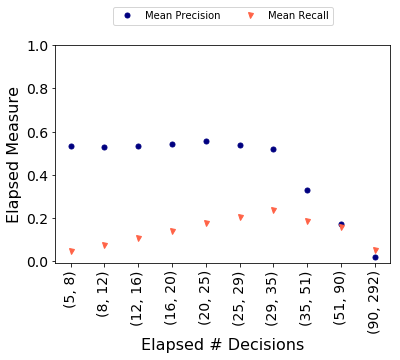

In [33]:
# plt.clf()
# width= 0.5
# p1 = plt.bar(cords, Ps, align = 'center', color = 'navy', label="P", width= width)
# p2 = plt.bar([c+width for c in cords], Rs, align = 'center', color = 'tomato', label="R", width= width)
# plt.xticks(cords, names, fontsize=8)
# # plt.yticks(,fontsize=14)
# plt.ylabel("Eval", fontsize=16)
# plt.xlabel("Type", fontsize=16)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2, fancybox=True)
# # plt.savefig('control_p6.eps', bbox_inches = 'tight', format='eps')
# plt.savefig('P_R_over_time.jpg', bbox_inches = 'tight', format='jpg')
# plt.show()

plt.clf()
width = 0.5

plt.plot(cords, Ps, color = 'navy',
          label="Mean Precision", markersize=5, marker='o', linewidth=0)
plt.plot(cords, Rs, color = 'tomato',
          label="Mean Recall", markersize=5, marker='v', linewidth=0)

# y = np.array(pd.to_numeric(quality_seqs_full['P']))
# x = np.array(pd.to_numeric(quality_seqs_full['sub_matcher']))
# slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(x,y)
# Trend_Correct = intercept1 + slope1*x
# p4 = plt.plot(x, Trend_Correct, linestyle='-', color = 'navy',
#               label='Trend Precision', markersize=0)

# y = np.array(pd.to_numeric(quality_seqs_full['R']))
# x = np.array(pd.to_numeric(quality_seqs_full['sub_matcher']))
# slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x,y)
# Trend_Correct = intercept2 + slope2*x
# p6 = plt.plot(x, Trend_Correct, linestyle='-', color = 'tomato',
#               label='Trend Recall', markersize=0)

plt.xticks(cords, names, fontsize=14, rotation=90)
plt.yticks(np.linspace(0.0, 1.0, num=6),fontsize=14)
plt.ylabel("Elapsed Measure", fontsize=16)
plt.xlabel("Elapsed # Decisions", fontsize=16)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2, fancybox=True)
plt.savefig('P_R_over_time.eps', bbox_inches = 'tight', format='eps')
plt.show()

In [35]:
# quality_seqs_full['sub_matcher_bins'] = quality_seqs_full['sub_matcher_bins'].astype(int)
Ress = quality_seqs_full.groupby('sub_matcher_bins')['Res'].mean().values.tolist()
Cals = quality_seqs_full.groupby('sub_matcher_bins')['Cal'].mean().values.tolist()
# names = [(math.ceil(s[0].left), math.ceil(s[0].right)) for s in list(quality_seqs_full.groupby('sub_matcher_bins')['sub_matcher_bins'])]
# cords = list(range(len(names))

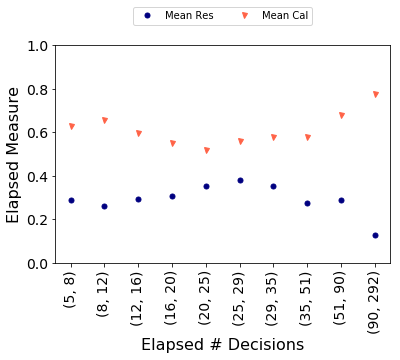

In [36]:
plt.clf()
width = 0.5

plt.plot(cords, Ress, color = 'navy',
          label="Mean Res", markersize=5, marker='o', linewidth=0)
plt.plot(cords, Cals, color = 'tomato',
          label="Mean Cal", markersize=5, marker='v', linewidth=0)

plt.xticks(cords, names, fontsize=14, rotation=90)
plt.yticks(np.linspace(0.0, 1.0, num=6),fontsize=14)
plt.ylabel("Elapsed Measure", fontsize=16)
plt.xlabel("Elapsed # Decisions", fontsize=16)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2, fancybox=True)
plt.savefig('Res_Cal_over_time.eps', bbox_inches = 'tight', format='eps')
plt.show()